## Aplicação do Algoritmo a priori

---



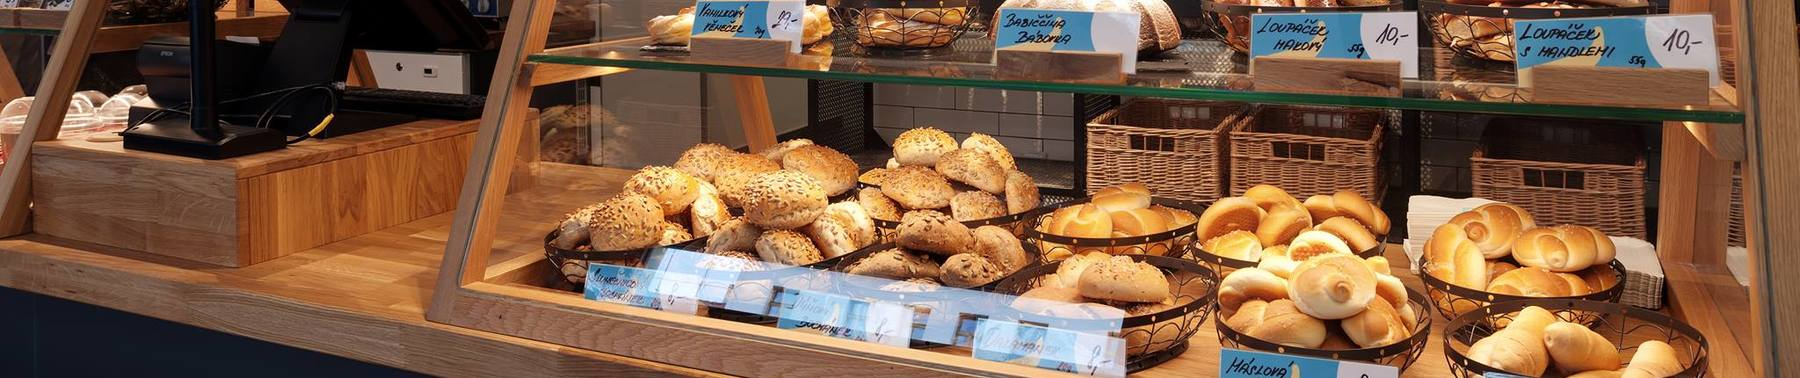

## 1.0 Leitura da base de dados.
Fonte: https://github.com/viktree/curly-octo-chainsaw/blob/master/BreadBasket_DMS.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

# Configuração para exibir todo o conteúdo das colunas
pd.set_option('display.max_columns', None)

# Carregar os dados do CSV
url = "https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/master/BreadBasket_DMS.csv"
df = pd.read_csv(url)

# Visualizar as primeiras linhas do DataFrame
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## 1.1 Preparação dos dados

In [ ]:
# Pré-processamento dos dados
# Remover colunas irrelevantes
df = df.drop(columns=['Date', 'Time'])

# Excluir o item "NONE"
df = df[df['Item'] != 'NONE']

# Transformar os dados de transações em um formato de cesta de compras
basket = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Aplicar o algoritmo Apriori para encontrar os itemsets frequentes
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Ordenar os itemsets por suporte
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Visualizar os itemsets frequentes
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Coffee, Cake)"


## 1.2 Visualização dos dados

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


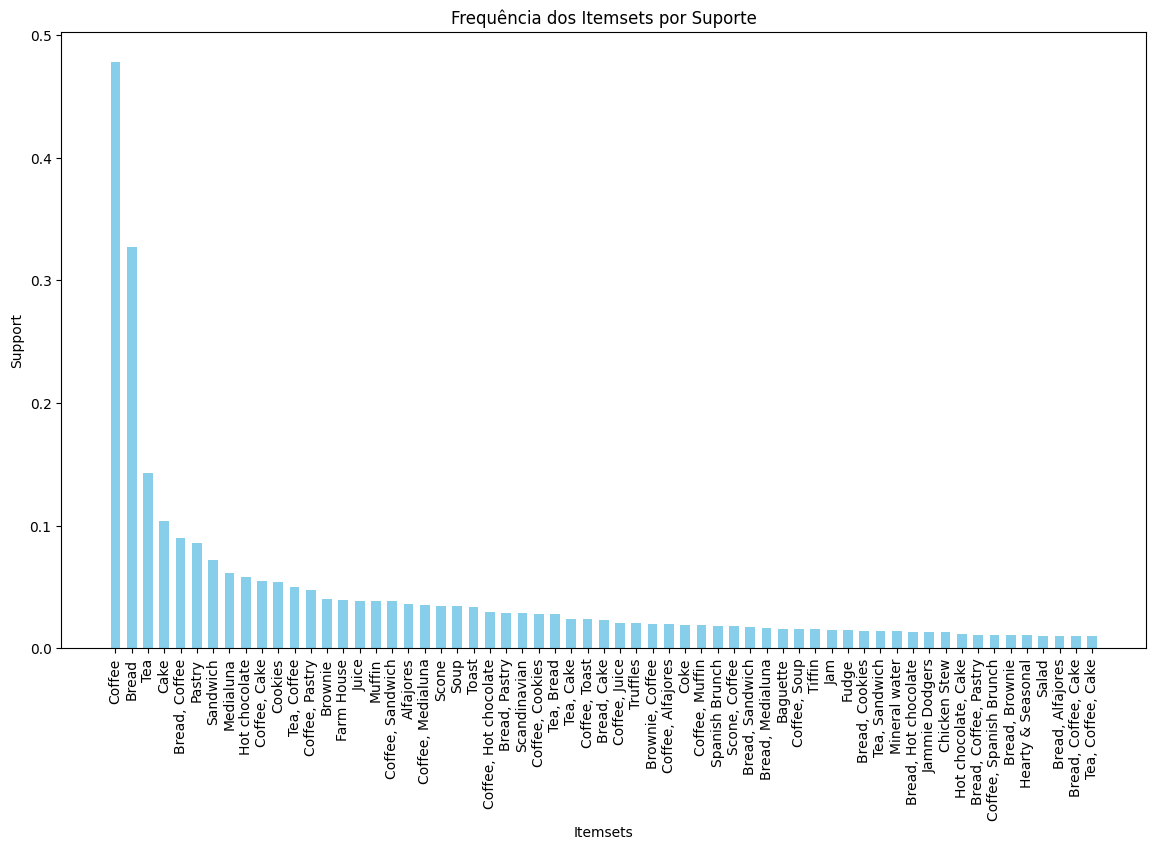

In [ ]:
# Plotar a frequência de todos os itens com colunas mais largas
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.figure(figsize=(14, 8))
plt.bar(frequent_itemsets['itemsets_str'], frequent_itemsets['support'], color='skyblue', width=0.6)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequência dos Itemsets por Suporte')
plt.xticks(rotation=90)
plt.show()

# 2.0 Seção de perguntas

### 2.1 Quais os 5 itens mais vendidos?

In [ ]:
# Aplicar o algoritmo Apriori para encontrar os itemsets frequentes
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Ordenar os itemsets por suporte
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Visualizar os itemsets frequentes
frequent_itemsets.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"


## 2.2 Quais são os menos frequentes?

In [ ]:
# Aplicar o algoritmo Apriori para encontrar os itemsets frequentes
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Ordenar os itemsets por suporte
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=True)

# Visualizar os itemsets frequentes
frequent_itemsets.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
470,0.001057,"(Tea, Coffee, Sandwich, Cake)"
313,0.001057,"(Cookies, Juice, Alfajores)"
420,0.001057,"(Farm House, Coffee, Pastry)"
315,0.001057,"(Tea, Pastry, Alfajores)"
71,0.001057,"(Alfajores, Spanish Brunch)"


## 3.0 Regras de Associação

In [ ]:
# Gerar regras de associação
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.001)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Tea, Coffee, Sandwich)",(Cake),0.005388,0.103856,0.001057,0.196078,1.887978,0.000497,1.114715,0.472881
1,"(Tea, Coffee, Cake)",(Sandwich),0.010037,0.071844,0.001057,0.105263,1.465170,0.000335,1.037351,0.320704
2,"(Tea, Sandwich, Cake)",(Coffee),0.001479,0.478394,0.001057,0.714286,1.493091,0.000349,1.825621,0.330737
3,"(Coffee, Sandwich, Cake)",(Tea),0.004649,0.142631,0.001057,0.227273,1.593434,0.000393,1.109537,0.374164
4,"(Tea, Coffee)","(Sandwich, Cake)",0.049868,0.006867,0.001057,0.021186,3.085072,0.000714,1.014629,0.711331


### Selecionando os item mais frequentes comprados juntos

In [ ]:
# Ordenar as regras por suporte e pegar os 5 primeiros
max_support_item = rules.sort_values(by='support', ascending=False)
max_support_item.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1543,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1542,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1541,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
1540,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1539,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856


### 3.1 O Cafézinho é geralmente comprado com quais outros produtos?

In [ ]:
# Filtrar as regras onde "Coffee" é o antecessor
coffee_antecessor = rules[rules['antecedents'].apply(lambda x: 'Coffee' in x)]

# Filtrar as regras onde "Coffee" é o sucessor
coffee_sucessor = rules[rules['consequents'].apply(lambda x: 'Coffee' in x)]

# Combinar os dois filtros
coffee_rules = pd.concat([coffee_antecessor, coffee_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
coffee_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1542,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1543,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1540,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1541,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
1539,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856
1538,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.300482
1536,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
1537,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1534,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
1535,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205


### 3.2 Se alguem pedir café, quais produtos eu deveria oferecer para acompanhar o café?

In [ ]:
# Filtrar as regras onde "Coffee" é o antecessor
coffee_antecessor_rules = rules[rules['antecedents'].apply(lambda x: 'Coffee' in x)]

# Visualizar as regras filtradas
coffee_antecessor_rules.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
587,"(Coffee, Extra Salami or Feta)",(Salad),0.003275,0.010460,0.001479,0.451613,43.176931,0.001445,1.804456,0.980049
63,"(Coffee, Vegan mincepie)",(Cake),0.003170,0.103856,0.001057,0.333333,3.209563,0.000727,1.344216,0.690620
366,"(Coffee, Smoothies)",(Bread),0.004015,0.327205,0.001268,0.315789,0.965111,-0.000046,0.983315,-0.035025
915,"(Coffee, Coke)",(Sandwich),0.006445,0.071844,0.002007,0.311475,4.335463,0.001544,1.348037,0.774335
492,"(Coffee, Frittata)",(Bread),0.004543,0.327205,0.001373,0.302326,0.923962,-0.000113,0.964339,-0.076358
...,...,...,...,...,...,...,...,...,...,...
11,(Coffee),"(Tea, Sandwich, Cake)",0.478394,0.001479,0.001057,0.002208,1.493091,0.000349,1.000731,0.633138
89,(Coffee),"(Smoothies, Cake)",0.478394,0.001585,0.001057,0.002208,1.393551,0.000298,1.000625,0.541422
71,(Coffee),"(Cake, Truffles)",0.478394,0.002641,0.001057,0.002208,0.836131,-0.000207,0.999566,-0.273115
54,(Coffee),"(Bread, Salad)",0.478394,0.002007,0.001057,0.002208,1.100172,0.000096,1.000202,0.174559


### 3.3 Se alguem pedir só um café puro, o que mais eu poderia oferecer?

In [ ]:
# Filtrar as regras onde "Coffee" é o único antecessor
coffee_only_antecessor = rules[rules['antecedents'].apply(lambda x: len(x) == 1 and 'Coffee' in x)]

# Visualizar as regras filtradas
coffee_only_antecessor.sort_values(by='confidence', ascending=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1543,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1540,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1539,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856
1536,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
1534,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
...,...,...,...,...,...,...,...,...,...,...
127,(Coffee),"(Brownie, Medialuna)",0.478394,0.002007,0.001057,0.002208,1.100172,0.000096,1.000202,0.174559
139,(Coffee),"(Bread, Hot chocolate, Pastry)",0.478394,0.001585,0.001057,0.002208,1.393551,0.000298,1.000625,0.541422
161,(Coffee),"(Muffin, Pastry)",0.478394,0.002536,0.001057,0.002208,0.870970,-0.000157,0.999672,-0.221195
168,(Coffee),"(Scone, Pastry)",0.478394,0.002430,0.001057,0.002208,0.908838,-0.000106,0.999778,-0.161287


## 4.0 Para quais itens foram criadas regras de associação?

In [ ]:
# Extrair todos os itens dos conjuntos de antecessores e sucessores
all_items = set()

for itemset in rules['antecedents']:
    all_items.update(itemset)

for itemset in rules['consequents']:
    all_items.update(itemset)

# Converter o conjunto em uma lista
all_items_list = list(all_items)

# Visualizar a lista de todos os itens
print("Lista de todos os itens nas regras de associação:")
for item in all_items_list:
    print(item)

Lista de todos os itens nas regras de associação:
Spanish Brunch
Tiffin
Coffee
Medialuna
The Nomad
Farm House
Tartine
Chicken Stew
Mineral water
Alfajores
Muffin
Frittata
Brownie
Scandinavian
Toast
Hot chocolate
Cake
Smoothies
Bakewell
Sandwich
Art Tray
Truffles
Tea
Hearty & Seasonal
Scone
Extra Salami or Feta
Juice
Eggs
Jam
Granola
Soup
Bread
Keeping It Local
Focaccia
Jammie Dodgers
Cookies
Pastry
Baguette
Vegan mincepie
Salad
Coke
Fudge


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Questão 1: Aumento de Vendas de Produtos Complementares

**Contextualização**: Como gestor da padaria, você deseja aumentar as vendas sugerindo produtos complementares aos clientes. Você quer saber quais produtos frequentemente são comprados junto com "Sandwich" para promover ofertas combinadas.

> Pergunta: Quais são os produtos mais frequentemente comprados junto com "Sandwich"?

In [ ]:
# Filtrar as regras onde "Sandwich" é o antecessor
sandwich_antecessor = rules[rules['antecedents'].apply(lambda x: 'Sandwich' in x)]

# Filtrar as regras onde "Sandwich" é o sucessor
sandwich_sucessor = rules[rules['consequents'].apply(lambda x: 'Sandwich' in x)]

# Combinar os dois filtros
sandwich_rules = pd.concat([sandwich_antecessor, sandwich_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
sandwich_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1534,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
1535,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
1506,(Bread),(Sandwich),0.327205,0.071844,0.017010,0.051986,0.723596,-0.006498,0.979053,-0.362147
1507,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,-0.291561
1498,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134,0.334566
1499,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050
1432,"(Coffee, Sandwich)",(Bread),0.038246,0.327205,0.007184,0.187845,0.574090,-0.005330,0.828407,-0.435472
1431,"(Bread, Sandwich)",(Coffee),0.017010,0.478394,0.007184,0.422360,0.882871,-0.000953,0.902995,-0.118915
1435,(Sandwich),"(Bread, Coffee)",0.071844,0.090016,0.007184,0.100000,1.110915,0.000717,1.011094,0.107570
1430,"(Bread, Coffee)",(Sandwich),0.090016,0.071844,0.007184,0.079812,1.110915,0.000717,1.008660,0.109718


### Questão 2: Promoções de Produtos Estacionais

**Contextualização**: Durante o verão, você deseja promover bebidas refrescantes. Você quer saber quais produtos são frequentemente comprados com "Juice" para criar pacotes promocionais.

> Pergunta: Quais produtos são frequentemente comprados junto com "Juice"?

In [ ]:
# Filtrar as regras onde "Juice" é o antecessor
juice_antecessor = rules[rules['antecedents'].apply(lambda x: 'Juice' in x)]

# Filtrar as regras onde "Juice" é o sucessor
juice_sucessor = rules[rules['consequents'].apply(lambda x: 'Juice' in x)]

# Combinar os dois filtros
juice_rules = pd.concat([juice_antecessor, juice_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
juice_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1516,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
1517,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
1444,(Bread),(Juice),0.327205,0.038563,0.007396,0.022603,0.586117,-0.005222,0.983670,-0.512092
1445,(Juice),(Bread),0.038563,0.327205,0.007396,0.191781,0.586117,-0.005222,0.832441,-0.423454
1428,(Tea),(Juice),0.142631,0.038563,0.007184,0.050370,1.306180,0.001684,1.012434,0.273404
1429,(Juice),(Tea),0.038563,0.142631,0.007184,0.186301,1.306180,0.001684,1.053669,0.243811
1426,(Cake),(Juice),0.103856,0.038563,0.007079,0.068159,1.767458,0.003074,1.031760,0.484538
1427,(Juice),(Cake),0.038563,0.103856,0.007079,0.183562,1.767458,0.003074,1.097626,0.451632
1384,(Juice),(Cookies),0.038563,0.054411,0.006128,0.158904,2.920442,0.004030,1.124234,0.683962
1385,(Cookies),(Juice),0.054411,0.038563,0.006128,0.112621,2.920442,0.004030,1.083457,0.695425


### Questão 3: Combinações de Produtos de Panificação

**Contextualização**: Você quer entender melhor os hábitos de compra relacionados aos produtos de panificação. Especificamente, deseja saber quais produtos são frequentemente comprados junto com "Bread".

> Pergunta: Quais produtos são frequentemente comprados junto com "Bread"?

In [ ]:
# Filtrar as regras onde "Bread" é o antecessor
bread_antecessor = rules[rules['antecedents'].apply(lambda x: 'Bread' in x)]

# Filtrar as regras onde "Bread" é o sucessor
bread_sucessor = rules[rules['consequents'].apply(lambda x: 'Bread' in x)]

# Combinar os dois filtros
bread_rules = pd.concat([bread_antecessor, bread_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
bread_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1543,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1542,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1529,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1528,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1524,(Tea),(Bread),0.142631,0.327205,0.028104,0.197037,0.602181,-0.018566,0.837890,-0.435198
1525,(Bread),(Tea),0.327205,0.142631,0.028104,0.085890,0.602181,-0.018566,0.937927,-0.495438
1519,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947
1518,(Bread),(Cake),0.327205,0.103856,0.023349,0.071359,0.687097,-0.010633,0.965006,-0.403653
1507,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,-0.291561
1506,(Bread),(Sandwich),0.327205,0.071844,0.017010,0.051986,0.723596,-0.006498,0.979053,-0.362147


### Questão 4: Estratégias de Cross-Selling

**Contextualização**: Você está desenvolvendo estratégias de cross-selling e quer saber quais produtos são frequentemente comprados junto com "Cake" para sugeri-los como compras adicionais.

> Pergunta: Quais produtos são frequentemente comprados junto com "Cake"?

In [ ]:
# Filtrar as regras onde "Cake" é o antecessor
cake_antecessor = rules[rules['antecedents'].apply(lambda x: 'Cake' in x)]

# Filtrar as regras onde "Cake" é o sucessor
cake_sucessor = rules[rules['consequents'].apply(lambda x: 'Cake' in x)]

# Combinar os dois filtros
cake_rules = pd.concat([cake_antecessor, cake_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
cake_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1540,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1541,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
1522,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
1523,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
1519,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947
1518,(Bread),(Cake),0.327205,0.103856,0.023349,0.071359,0.687097,-0.010633,0.965006,-0.403653
1495,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
1494,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
1476,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
1474,(Coffee),"(Bread, Cake)",0.478394,0.023349,0.010037,0.020981,0.898557,-0.001133,0.997581,-0.177928


### Questão 5: Otimização de Layout da Loja

**Contextualização**: Para otimizar o layout da loja, você deseja saber quais produtos são frequentemente comprados junto com "Salad" para posicioná-los próximos uns dos outros.

> Pergunta: Quais produtos são frequentemente comprados junto com "Salad"?

In [ ]:
# Filtrar as regras onde "Salad" é o antecessor
salad_antecessor = rules[rules['antecedents'].apply(lambda x: 'Salad' in x)]

# Filtrar as regras onde "Salad" é o sucessor
salad_sucessor = rules[rules['consequents'].apply(lambda x: 'Salad' in x)]

# Combinar os dois filtros
salad_rules = pd.concat([salad_antecessor, salad_sucessor]).drop_duplicates()

# Visualizar as regras filtradas
salad_rules.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1396,(Coffee),(Salad),0.478394,0.010460,0.006550,0.013693,1.309094,0.001547,1.003278,0.452665
1397,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,0.001547,1.395648,0.238608
900,(Tea),(Salad),0.142631,0.010460,0.002007,0.014074,1.345567,0.000516,1.003666,0.299543
898,(Bread),(Salad),0.327205,0.010460,0.002007,0.006135,0.586540,-0.001415,0.995649,-0.511656
901,(Salad),(Tea),0.010460,0.142631,0.002007,0.191919,1.345567,0.000516,1.060994,0.259533
899,(Salad),(Bread),0.010460,0.327205,0.002007,0.191919,0.586540,-0.001415,0.832583,-0.416012
874,(Sandwich),(Salad),0.071844,0.010460,0.001902,0.026471,2.530749,0.001150,1.016446,0.651679
875,(Salad),(Sandwich),0.010460,0.071844,0.001902,0.181818,2.530749,0.001150,1.134413,0.611253
725,(Extra Salami or Feta),(Salad),0.004015,0.010460,0.001690,0.421053,40.255183,0.001648,1.709206,0.979089
724,(Salad),(Extra Salami or Feta),0.010460,0.004015,0.001690,0.161616,40.255183,0.001648,1.187982,0.985466


### Questão 6: Impacto de Promoções em Vendas de Produtos Associados

**Contextualização**: Você deseja avaliar o impacto de uma promoção em "Coffee" nas vendas de produtos associados. Para isso, você precisa identificar quais produtos têm uma alta confiança e lift quando "Coffee" está em promoção.

> Pergunta: Quais produtos têm uma alta confiança (acima de 10\%) e lift (acima de 1) quando "Coffee" é o antecessor?

In [ ]:
# Filtrar as regras onde "Coffee" é o antecessor e têm alta confiança e lift
coffee_antecessor = rules[(rules['antecedents'].apply(lambda x: len(x) == 1 and 'Coffee' in x)) &
                          (rules['confidence'] > 0.10) &
                          (rules['lift'] > 1)]

# Visualizar as regras filtradas
coffee_antecessor[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1540,(Coffee),(Cake),0.054728,0.114399,1.101515


### Questão 7 (desafio): Análise de Produtos Substitutos

**Contextualização**: Você está interessado em identificar possíveis produtos substitutos para "Cake" que os clientes compram quando "Cake" não está disponível. Para isso, você deseja analisar as regras onde "Cake" é o consequente.

> Pergunta: Quais produtos têm alta confiança (acima de 30\%) ao anteceder "Cake"?

In [ ]:
# Filtrar as regras onde "Coffee" é o antecessor e têm alta confiança e lift
cake_consequents = rules[(rules['consequents'].apply(lambda x: len(x) == 1 and 'Cake' in x)) &
                          (rules['confidence'] > 0.30) ]


# Visualizar as regras filtradas
cake_consequents[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
63,"(Coffee, Vegan mincepie)",(Cake),0.001057,0.333333,3.209563
651,"(Bread, Jammie Dodgers)",(Cake),0.001585,0.340909,3.282507


### Questão 8 (desafio): Estratégia de Mix de Produtos

**Contextualização**: Para otimizar o mix de produtos, você deseja identificar combinações de três ou mais produtos que frequentemente aparecem juntos nas compras. Isso ajudará a criar pacotes promocionais eficazes.

> Pergunta: Quais combinações de três ou mais produtos têm alta confiança (acima de 0.3)?

In [ ]:
# Filtrar as regras com três ou mais itens no antecedente e alta confiança
multi_product_rules = rules[(rules['antecedents'].apply(lambda x: len(x) >= 3)) &
                            (rules['confidence'] > 0.3)]

# Visualizar as regras filtradas
multi_product_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
2,"(Tea, Sandwich, Cake)",(Coffee),0.001057,0.714286,1.493091
130,"(Bread, Hot chocolate, Pastry)",(Coffee),0.001057,0.666667,1.393551
276,"(Bread, Medialuna, Pastry)",(Coffee),0.001162,0.478261,0.999722


### Questão 9 (desafio): Produtos de Alta Margem

**Contextualização**: Você deseja focar em produtos de alta margem de lucro e descobrir quais itens frequentemente são comprados junto com esses produtos para maximizar os lucros. Suponha que "Truffles" e "Farm House" são produtos de alta margem.

> Pergunta: Quais produtos são frequentemente comprados junto com "Truffles" e "Farm House"?

In [ ]:
truffles_farm_house = rules[rules['antecedents'].apply(lambda x: 'Truffles' in x or "Farm House" in x)]

# Visualizar as regras filtradas
truffles_farm_house[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
20,"(Farm House, Coffee)",(Pastry),0.001057,0.158730,1.843412
21,"(Farm House, Pastry)",(Coffee),0.001057,0.384615,0.803972
23,(Farm House),"(Coffee, Pastry)",0.001057,0.026954,0.566936
69,"(Coffee, Truffles)",(Cake),0.001057,0.140845,1.356153
70,"(Cake, Truffles)",(Coffee),0.001057,0.400000,0.836131
73,(Truffles),"(Coffee, Cake)",0.001057,0.052083,0.951677
93,(Truffles),(Chicken Stew),0.001057,0.052083,4.007876
181,(Truffles),(Alfajores),0.001162,0.057292,1.576354
187,(Truffles),(Mineral water),0.001162,0.057292,4.046758
230,(Farm House),(Brownie),0.001162,0.029650,0.740458


Os produtos que são frequentemente comprados junto com "Truffles" e "Farm House" são: Cofee,Pastry,cake...

### Questão 10 (desafio): Análise de Impacto de Produtos Principais

**Contextualização**: Para entender o impacto dos produtos principais, você deseja analisar como a presença de produtos como "Sandwich" afeta a compra de outros itens. Você quer ver quais itens têm uma confiança e lift significativos quando "Sandwich" é o antecessor.

> Pergunta: Quais produtos têm uma confiança (acima de 0.2) e lift (acima de 1) significativos quando "Sandwich" é o antecessor?

In [ ]:
# Filtrar as regras onde "Sandwich" é o antecessor e têm alta confiança e lift
sandwich_antecessor = rules[(rules['antecedents'].apply(lambda x: 'Sandwich' in x)) &
                          (rules['confidence'] > 0.20) &
                          (rules['lift'] > 1)]

# Visualizar as regras filtradas
sandwich_antecessor[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
2,"(Tea, Sandwich, Cake)",(Coffee),0.001057,0.714286,1.493091
3,"(Coffee, Sandwich, Cake)",(Tea),0.001057,0.227273,1.593434
44,"(Sandwich, Chicken Stew)",(Coffee),0.001057,0.526316,1.100172
150,"(Sandwich, Coke)",(Juice),0.001057,0.204082,5.292144
235,"(Sandwich, Soup)",(Cake),0.001162,0.211538,2.036838
308,"(Sandwich, Spanish Brunch)",(Coffee),0.001268,0.666667,1.393551
394,"(Sandwich, Hearty & Seasonal)",(Coffee),0.001268,0.857143,1.791709
426,"(Sandwich, Medialuna)",(Coffee),0.001373,0.650000,1.358712
480,"(Sandwich, Muffin)",(Coffee),0.001373,0.650000,1.358712
560,"(Sandwich, Alfajores)",(Coffee),0.001479,0.560000,1.170583


Os produtos que têm uma confiança (acima de 0.2) e lift (acima de 1) significativos quando "Sandwich" é o antecessor são: Tea,Cake,cofee,chicken stew...